In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [63]:
def ec_schordinger (x,y,E):
    #y es el vector = [f,f´]
    f,df= y
    ddf = (x**2-2*E)*f
    return [df,ddf]

In [ ]:
def evento_convergencia(x, y, E, threshold=12):
    # y[0] es f(x)
    hipotenusa = np.sqrt(y[0]**2 + y[1]**2)
    return threshold - hipotenusa

In [100]:
def solve_for_energy(E, x_max=6.0):
    y0 = [0.3, 0.0]  # f(0)=1, f'(0)=0 (pares)
    x_span = (0, x_max)
    
    ev_func = lambda x, y: evento_convergencia(x, y, E)
    ev_func.terminal = True
    ev_func.direction = -1

    sol = solve_ivp(
        lambda x, y: ec_schordinger(x, y, E),
        x_span,
        y0,
        rtol=1e-7, 
        atol=1e-9,
        events=lambda x, y: evento_convergencia(x, y, E)   
    )
    
    f_at_end = sol.y[0][-1] 
    event_triggered = (len(sol.t_events[0]) > 0)
    return sol, event_triggered


In [96]:
def solve_for_energy_anti(E, x_max=6.0):
    y0 = [0.0, 1.0]  # f(0)=1, f'(0)=0 (pares)
    x_span = (0, x_max)
    
    ev_func = lambda x, y: evento_convergencia(x, y, E)
    ev_func.terminal = True
    ev_func.direction = -1

    sol = solve_ivp(
        lambda x, y: ec_schordinger(x, y, E),
        x_span,
        y0,
        rtol=1e-7, 
        atol=1e-9,
        events=lambda x, y: evento_convergencia(x, y, E)   
    )
    
    f_at_end = sol.y[0][-1] 
    event_triggered = (len(sol.t_events[0]) > 0)
    return sol, event_triggered

In [97]:
energies_A = np.arange(0.0, 9.52, 0.1)
candidates_A = []  # Aquí se guardarán las energías donde la solución converge

for E in energies_A:
    sol, event_triggered = solve_for_energy_anti(E)
    if not event_triggered:
        candidates_A.append(E)

candidates_A = np.array(candidates_A)
print(candidates_A)

[1.5 3.5 5.5 7.5 9.5]


In [101]:
energies = np.arange(0.0, 10.0, 0.1)
candidates = []  # Aquí se guardarán las energías donde la solución converge

for E in energies:
    sol, event_triggered = solve_for_energy(E)
    if not event_triggered:
        candidates.append(E)

candidates = np.array(candidates)
print(candidates)

[0.5 2.5 4.5 6.5 8.5]


In [ ]:
candidatos= np.concatenate((candidates,candidates_A))

array([0.5, 2.5, 4.5, 6.5, 8.5, 1.5, 3.5, 5.5, 7.5, 9.4, 9.5])

In [120]:
plt.figure(figsize=(6,7))
x=np.linspace(-6,6,200)
plt.plot(x,1/2*x**2,linestyle="--",color="lightgray")

for e in candidates:
    sol, _ = solve_for_energy(e)
    t_negativo = -sol.t[::-1]
    y_negativo= sol.y[0][::-1] 
    t=np.concatenate((t_negativo, sol.t))
    E= np.concatenate((y_negativo, sol.y[0]))
    E= E+e
    plt.axhline(y=e, color='lightgray')
    plt.plot(t, E)

for r in candidates_A:
    sol_a,_= solve_for_energy_anti(r)
    t_n = -sol_a.t[::-1]
    y_n= -sol_a.y[0][::-1]
    t_A= np.concatenate((t_n, sol_a.t))
    E_An= np.concatenate((y_n,sol_a.y[0]))
    E_An= E_An+r
    plt.axhline(y=r, color='lightgray')
    plt.plot(t_A,E_An)


plt.ylim(0,10)
plt.xlim(-6,6)
plt.ylabel("Energía")
plt.savefig("4.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.clf()

<Figure size 600x700 with 0 Axes>

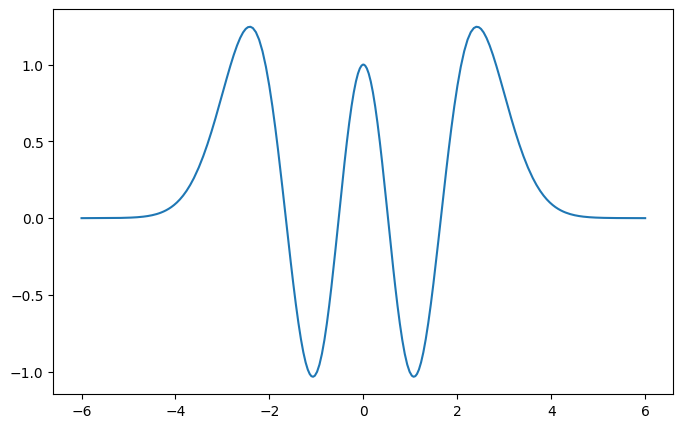

In [43]:
E_candidate=candidates[2]
sol, _ = solve_for_energy(E_candidate)
 # f(x)
x_negativo = -sol.t[::-1]  # Invertir el rango de 0 a 5 para obtener -5 a 0
y_negativo = sol.y[0][::-1] 

x_completo = np.concatenate((x_negativo, sol.t))
y_completo = np.concatenate((y_negativo, sol.y[0]))

plt.figure(figsize=(8,5))
plt.plot(x_completo, y_completo, label="f(x)")


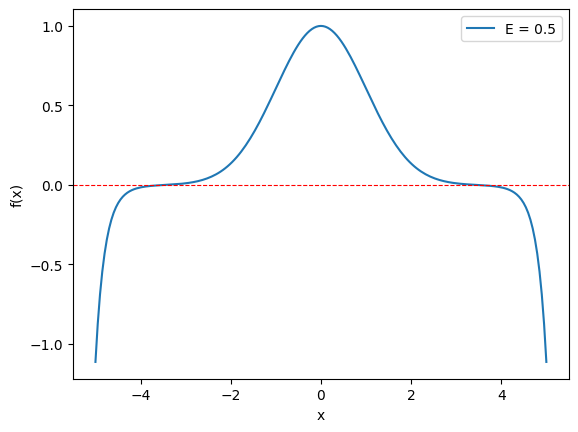

In [29]:

# Suponiendo que ya encontraste E0 con find_energy_bisection
E0 = 0.5 # o el valor aproximado encontrado
x_eval = np.linspace(0, 5, 100)
sol = solve_ivp(
    lambda xx, yy: ec_schordinger(xx, yy, E0),
    (0, 5),
    [1.0, 0.0],  # Solución par
    t_eval=x_eval
)

f_sol = sol.y[0]  # f(x)
x_negativo = -x_eval[::-1]  # Invertir el rango de 0 a 5 para obtener -5 a 0
y_negativo = f_sol[::-1] 

x_completo = np.concatenate((x_negativo, x_eval))
y_completo = np.concatenate((y_negativo, f_sol))

plt.plot(x_completo, y_completo, label=f"E = {E0}")
plt.axhline(0, color='k', linewidth=0.8,linestyle= "--",c="r")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


Buscando energías (solución convergente sin disparo del evento):
E = 0.00, evento disparado: True
E = 0.10, evento disparado: True
E = 0.20, evento disparado: True
E = 0.30, evento disparado: True
E = 0.40, evento disparado: True
E = 0.50, evento disparado: False
E = 0.60, evento disparado: True
E = 0.70, evento disparado: True
E = 0.80, evento disparado: True
E = 0.90, evento disparado: True
E = 1.00, evento disparado: True
E = 1.10, evento disparado: True
E = 1.20, evento disparado: True
E = 1.30, evento disparado: True
E = 1.40, evento disparado: True
E = 1.50, evento disparado: True
E = 1.60, evento disparado: True
E = 1.70, evento disparado: True
E = 1.80, evento disparado: True
E = 1.90, evento disparado: True
E = 2.00, evento disparado: True
E = 2.10, evento disparado: True
E = 2.20, evento disparado: True
E = 2.30, evento disparado: True
E = 2.40, evento disparado: True
E = 2.50, evento disparado: False
E = 2.60, evento disparado: True
E = 2.70, evento disparado: True
E = 2.80,

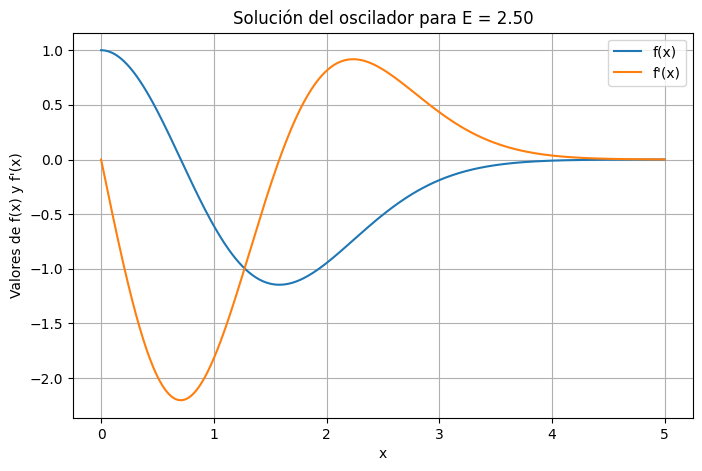

In [4]:

def schrodinger_osc(x, y, E):
    """
    Sistema de ecuaciones para el oscilador armónico adimensional.
    
    y[0] = f(x)
    y[1] = f'(x)
    
    La ecuación se reescribe como:
       f''(x) = (x^2 - 2E)*f(x)
    """
    f, df = y
    ddf = (x**2 - 2*E) * f
    return [df, ddf]

def event_combined(x, y, E, threshold=10):
    """
    Función de evento que se dispara cuando la magnitud combinada de f(x) y f'(x)
    (calculada como la hipotenusa) excede el valor 'threshold'.
    
    Se define:
       g(x, y) = threshold - sqrt(f(x)^2 + f'(x)^2)
       
    Cuando g(x, y) pasa a cero (o se vuelve negativo) se activa el evento.
    """
    combined = np.sqrt(y[0]**2 + y[1]**2)
    return threshold - combined

# Configuramos el evento para que sea terminal y se dispare al pasar de positivo a negativo.
event_combined.terminal = True
event_combined.direction = -1

def solve_for_energy_combined(E, x_max=5.0, threshold=10, n_points=200):
    """
    Integra la ecuación para un valor dado de E usando solve_ivp y el evento que acota la 
    magnitud combinada de f(x) y f'(x).
    
    Parámetros:
      - E: Valor de la energía a probar.
      - x_max: Extremo superior del dominio de integración.
      - threshold: Umbral para la magnitud combinada.
      - n_points: Número de puntos donde evaluar la solución.
    
    Devuelve:
      - sol: Objeto de solución de solve_ivp.
      - event_triggered: True si se disparó el evento (es decir, la solución diverge).
    """
    # Condiciones iniciales para una solución par: f(0)=1 y f'(0)=0.
    y0 = [1.0, 0.0]
    
    # Definimos el evento incorporando el parámetro E y el umbral.
    ev_func = lambda x, y: event_combined(x, y, E, threshold)
    ev_func.terminal = True
    ev_func.direction = -1
    
    sol = solve_ivp(lambda x, y: schrodinger_osc(x, y, E),
                    [0, x_max], y0,
                    t_eval=np.linspace(0, x_max, n_points),
                    events=ev_func,
                    rtol=1e-7, atol=1e-9)
    
    # Si el evento se disparó, la lista sol.t_events[0] tendrá al menos un elemento.
    event_triggered = (len(sol.t_events[0]) > 0)
    return sol, event_triggered

# --- Búsqueda de energías candidatas ---

# Recorremos un rango de energías. Aquí se buscan aquellas para las cuales
# la solución converge (es decir, no se dispara el evento de divergencia).
energies = np.arange(0.0, 50, 0.1)
candidates = []  # Lista para almacenar energías candidatas

print("Buscando energías (solución convergente sin disparo del evento):")
for E in energies:
    sol, event_triggered = solve_for_energy_combined(E)
    print("E = {:.2f}, evento disparado: {}".format(E, event_triggered))
    if not event_triggered:
        candidates.append(E)

print("\nEnergías candidatas (donde la solución no diverge):")
print(candidates)

# --- Graficar la solución para una energía candidata ---

if candidates:
    # Seleccionamos la primera energía candidata para visualizar la solución.
    E_candidate = candidates[1]
    sol, _ = solve_for_energy_combined(E_candidate, x_max=5.0, threshold=10, n_points=500)
    
    plt.figure(figsize=(8,5))
    plt.plot(sol.t, sol.y[0], label="f(x)")
    plt.plot(sol.t, sol.y[1], label="f'(x)")
    plt.title("Solución del oscilador para E = {:.2f}".format(E_candidate))
    plt.xlabel("x")
    plt.ylabel("Valores de f(x) y f'(x)")
    plt.legend()
    plt.grid(True)
    plt.show()


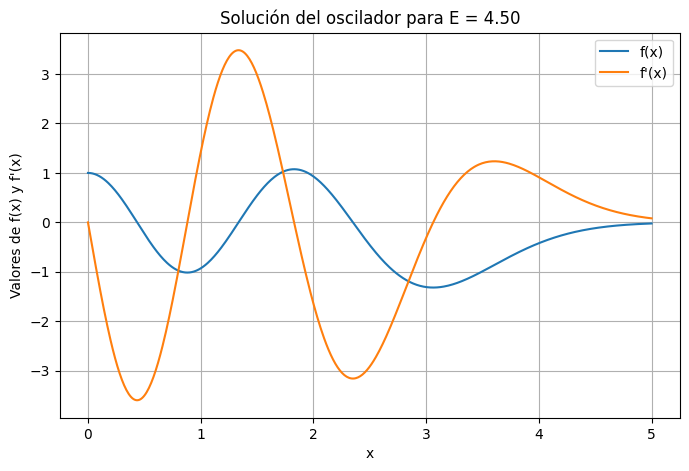

In [10]:
E_candidate = candidates[2]
sol, _ = solve_for_energy_combined(6.5, x_max=5.0, threshold=10, n_points=500)
    
plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], label="f(x)")
plt.plot(sol.t, sol.y[1], label="f'(x)")
plt.title("Solución del oscilador para E = {:.2f}".format(E_candidate))
plt.xlabel("x")
plt.ylabel("Valores de f(x) y f'(x)")
plt.legend()
plt.grid(True)
plt.show()